In [1]:
import librosa
import csv
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
#drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def extract_audio_features(audio_file):
    # Load the audio file
    audio, sr = librosa.load(audio_file)

    # Compute Root Mean Square Energy (RMSE)
    rmse = librosa.feature.rms(y=audio)

    # Compute Zero Crossing Rate (ZCR)
    zcr = librosa.feature.zero_crossing_rate(y=audio)

    # Compute Spectral Centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)

    # Compute Spectral Bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)

    # Compute Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)

    # Compute Mel-frequency Cepstral Coefficients (MFCCs)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr)

    # Compute Chroma Feature
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)

    # Create a dictionary to store the features
    features = {}

    # Add the single-value features to the dictionary
    features["RMSE"] = rmse.mean()
    features["ZCR"] = zcr.mean()
    features["Spectral Centroid"] = spectral_centroid.mean()
    features["Spectral Bandwidth"] = spectral_bandwidth.mean()
    features["Spectral Contrast"] = spectral_contrast.mean()

    # Add the MFCC values to the dictionary with separate keys
    for i, mfcc_value in enumerate(mfccs.mean(axis=1), start=1):
        features[f"MFCC_{i}"] = mfcc_value

    # Add the Chroma values to the dictionary with separate keys
    for i, chroma_value in enumerate(chroma.mean(axis=1), start=1):
        features[f"Chroma_{i}"] = chroma_value

    return features


In [ ]:
directory = "/content/drive/MyDrive/Siren_Data"

# Initialize empty list to store features and labels
data = []

# Loop through the directory and its subdirectories
for label in os.listdir(directory):
    label_dir = os.path.join(directory, label)
    if os.path.isdir(label_dir):
        # Loop through all .wav files in the label directory
        for filename in os.listdir(label_dir):
            if filename.endswith(".wav"):
                file_path = os.path.join(label_dir, filename)

                # Extract audio features
                audio_features = extract_audio_features(file_path)

                # Append features and label to the data list
                data.append(list(audio_features.values()) + [label])

# Define the path to the output .csv file
output_csv_path = "/content/drive/MyDrive/outputnew.csv"

# Write the data to the .csv file
with open(output_csv_path, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write the header row
    header = list(audio_features.keys()) + ['Label']
    writer.writerow(header)

    # Write the data row by row
    for row in data:
        writer.writerow(row)


In [2]:
df = pd.read_csv("/content/drive/MyDrive/outputnew.csv", header=0)

In [3]:
df.head()

,RMSE,ZCR,Spectral Centroid,Spectral Bandwidth,Spectral Contrast,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,...,Chroma_4,Chroma_5,Chroma_6,Chroma_7,Chroma_8,Chroma_9,Chroma_10,Chroma_11,Chroma_12,Label
0,0.099366,0.034296,901.440072,1301.021793,19.436539,-178.99489,191.29134,-21.595234,6.375634,10.101208,...,0.660503,0.635359,0.646069,0.580407,0.583834,0.563806,0.562368,0.650692,0.678732,traffic
1,0.086133,0.081291,1365.421679,1567.409427,21.901306,-151.63579,156.18192,-32.853000,3.799665,-3.148706,...,0.236776,0.259276,0.347202,0.277409,0.310216,0.356190,0.423478,0.845497,0.421606,traffic
2,0.115005,0.038803,1025.437895,1537.384412,19.498672,-146.07472,173.69655,-11.139687,13.415001,11.658173,...,0.614669,0.622880,0.431823,0.391049,0.423167,0.490465,0.542430,0.570529,0.632635,traffic
3,0.111000,0.033954,1051.805010,1573.984463,19.330489,-152.21115,168.60114,-12.617308,13.377914,9.031705,...,0.543675,0.486688,0.431743,0.555818,0.568199,0.581028,0.684014,0.693551,0.785429,traffic
4,0.088206,0.041023,972.925256,1327.958199,19.677013,-189.70117,187.08330,-23.920116,11.181483,8.873098,...,0.446810,0.410485,0.392210,0.390582,0.447418,0.528939,0.596902,0.694749,0.742713,traffic


In [4]:
df = pd.get_dummies(df,columns = ["Label"]) #convert categorical variable to dummy variable

In [5]:
df.head()

,RMSE,ZCR,Spectral Centroid,Spectral Bandwidth,Spectral Contrast,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,...,Chroma_9,Chroma_10,Chroma_11,Chroma_12,Label_ambulance,Label_fire alarm,Label_firetruck,Label_police,Label_tornado,Label_traffic
0,0.099366,0.034296,901.440072,1301.021793,19.436539,-178.99489,191.29134,-21.595234,6.375634,10.101208,...,0.563806,0.562368,0.650692,0.678732,0,0,0,0,0,1
1,0.086133,0.081291,1365.421679,1567.409427,21.901306,-151.63579,156.18192,-32.853000,3.799665,-3.148706,...,0.356190,0.423478,0.845497,0.421606,0,0,0,0,0,1
2,0.115005,0.038803,1025.437895,1537.384412,19.498672,-146.07472,173.69655,-11.139687,13.415001,11.658173,...,0.490465,0.542430,0.570529,0.632635,0,0,0,0,0,1
3,0.111000,0.033954,1051.805010,1573.984463,19.330489,-152.21115,168.60114,-12.617308,13.377914,9.031705,...,0.581028,0.684014,0.693551,0.785429,0,0,0,0,0,1
4,0.088206,0.041023,972.925256,1327.958199,19.677013,-189.70117,187.08330,-23.920116,11.181483,8.873098,...,0.528939,0.596902,0.694749,0.742713,0,0,0,0,0,1


In [6]:
X = df.loc[:,(df.columns != "Label_ambulance") & (df.columns != "Label_fire alarm") & (df.columns != "Label_firetruck") & (df.columns != "Label_police") & (df.columns != "Label_tornado") & (df.columns != "Label_traffic")] #mentioning what are independent variables
X.head()

,RMSE,ZCR,Spectral Centroid,Spectral Bandwidth,Spectral Contrast,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,...,Chroma_3,Chroma_4,Chroma_5,Chroma_6,Chroma_7,Chroma_8,Chroma_9,Chroma_10,Chroma_11,Chroma_12
0,0.099366,0.034296,901.440072,1301.021793,19.436539,-178.99489,191.29134,-21.595234,6.375634,10.101208,...,0.703092,0.660503,0.635359,0.646069,0.580407,0.583834,0.563806,0.562368,0.650692,0.678732
1,0.086133,0.081291,1365.421679,1567.409427,21.901306,-151.63579,156.18192,-32.853000,3.799665,-3.148706,...,0.279154,0.236776,0.259276,0.347202,0.277409,0.310216,0.356190,0.423478,0.845497,0.421606
2,0.115005,0.038803,1025.437895,1537.384412,19.498672,-146.07472,173.69655,-11.139687,13.415001,11.658173,...,0.549732,0.614669,0.622880,0.431823,0.391049,0.423167,0.490465,0.542430,0.570529,0.632635
3,0.111000,0.033954,1051.805010,1573.984463,19.330489,-152.21115,168.60114,-12.617308,13.377914,9.031705,...,0.641550,0.543675,0.486688,0.431743,0.555818,0.568199,0.581028,0.684014,0.693551,0.785429
4,0.088206,0.041023,972.925256,1327.958199,19.677013,-189.70117,187.08330,-23.920116,11.181483,8.873098,...,0.488388,0.446810,0.410485,0.392210,0.390582,0.447418,0.528939,0.596902,0.694749,0.742713


In [14]:
y = df[["Label_ambulance","Label_fire alarm","Label_firetruck", "Label_police", "Label_tornado", "Label_traffic"]]
y.head()

,Label_ambulance,Label_fire alarm,Label_firetruck,Label_police,Label_tornado,Label_traffic
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
X_train.shape

(981, 37)

In [16]:
X_test.shape


(246, 37)

In [17]:
from sklearn.ensemble import RandomForestClassifier


In [18]:
rf_clf = RandomForestClassifier(n_estimators=10000, n_jobs=-1 ,random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=42)

In [19]:
classes = ["ambulance", "fire alarm", "fire truck", "police", "tornado", "traffic"]
import numpy as np
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_clf.predict(X_test), target_names=classes,digits=4))

              precision    recall  f1-score   support

   ambulance     0.9677    0.9091    0.9375        33
  fire alarm     1.0000    0.7838    0.8788        37
  fire truck     1.0000    0.8333    0.9091        48
      police     1.0000    0.8478    0.9176        46
     tornado     0.9231    0.8182    0.8675        44
     traffic     1.0000    1.0000    1.0000        38

   micro avg     0.9815    0.8618    0.9177       246
   macro avg     0.9818    0.8654    0.9184       246
weighted avg     0.9819    0.8618    0.9165       246
 samples avg     0.8618    0.8618    0.8618       246



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize
#confusion_matrix(y_test, rf_clf.predict(X_test))
accuracy_score(y_test, rf_clf.predict(X_test))

0.8617886178861789

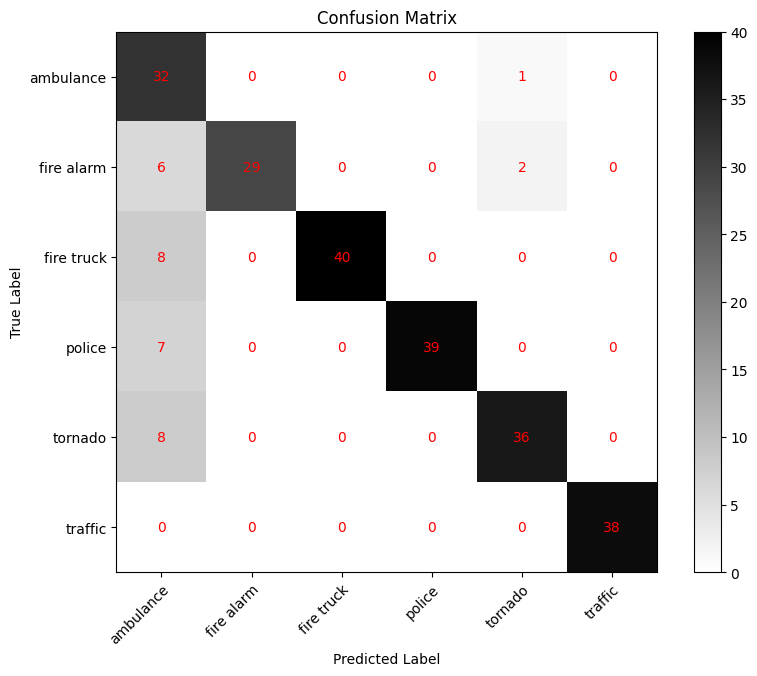

In [21]:

# Perform one-hot encoding on y_test
y_test_encoded = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])

# Convert one-hot encoded labels back to categorical labels
y_test_labels = np.argmax(y_test_encoded, axis=1)
y_pred_labels = np.argmax(rf_clf.predict(X_test), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6))
fig.tight_layout()

im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)

cbar = ax.figure.colorbar(im, ax=ax)

tick_marks = np.arange(len(classes))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()


XG Boost

In [22]:
import xgboost as xgb


In [23]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1)

In [24]:
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [25]:
accuracy_score(y_test, xgb_clf.predict(X_test))


0.8902439024390244

In [26]:
import numpy as np
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_clf.predict(X_test), target_names=classes))

              precision    recall  f1-score   support

   ambulance       0.91      0.97      0.94        33
  fire alarm       1.00      0.78      0.88        37
  fire truck       0.98      0.85      0.91        48
      police       0.98      0.91      0.94        46
     tornado       0.95      0.93      0.94        44
     traffic       1.00      1.00      1.00        38

   micro avg       0.97      0.91      0.94       246
   macro avg       0.97      0.91      0.94       246
weighted avg       0.97      0.91      0.94       246
 samples avg       0.90      0.91      0.90       246



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


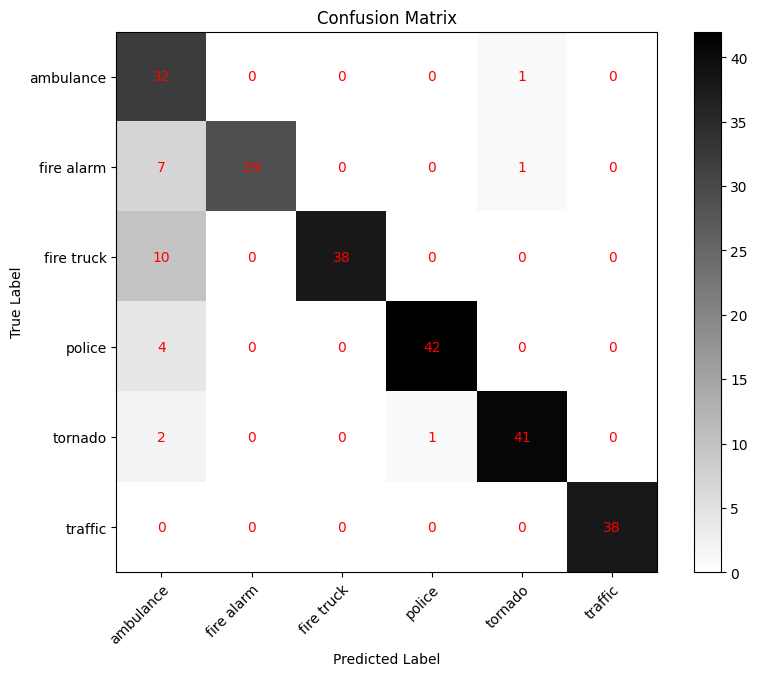

In [29]:
# Perform one-hot encoding on y_test
y_test_encoded = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])

# Convert one-hot encoded labels back to categorical labels
y_test_labels = np.argmax(y_test_encoded, axis=1)
y_pred_labels = np.argmax(xgb_clf.predict(X_test), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
classes = ["ambulance", "fire alarm", "fire truck", "police", "tornado", "traffic"]

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6))
fig.tight_layout()

im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)

cbar = ax.figure.colorbar(im, ax=ax)

tick_marks = np.arange(len(classes))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()


Feature trimming using XGBoost

In [34]:
X=df[["Spectral Bandwidth","MFCC_1", "MFCC_3", "Chroma_1", "MFCC_4", "MFCC_11", "MFCC_13", "Chroma_11", "MFCC_2", "MFCC_20"]]
X.head()

,Spectral Bandwidth,MFCC_1,MFCC_3,Chroma_1,MFCC_4,MFCC_11,MFCC_13,Chroma_11,MFCC_2,MFCC_20
0,1301.021793,-178.99489,-21.595234,0.668495,6.375634,-1.550505,2.416012,0.650692,191.29134,2.715720
1,1567.409427,-151.63579,-32.853000,0.438414,3.799665,-6.344933,-0.828367,0.845497,156.18192,2.825237
2,1537.384412,-146.07472,-11.139687,0.631233,13.415001,-7.081757,-1.460561,0.570529,173.69655,5.430470
3,1573.984463,-152.21115,-12.617308,0.896919,13.377914,-4.440953,1.023246,0.693551,168.60114,5.800740
4,1327.958199,-189.70117,-23.920116,0.713709,11.181483,-1.105590,0.319004,0.694749,187.08330,2.668064


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)
rf_clf = RandomForestClassifier(n_estimators=10000, n_jobs=-1 ,random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=42)

In [36]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.7479674796747967

In [37]:
import numpy as np
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_clf.predict(X_test), target_names=classes,digits=4))

              precision    recall  f1-score   support

   ambulance     0.9394    0.6889    0.7949        45
  fire alarm     0.9231    0.8372    0.8780        43
  fire truck     0.8065    0.7576    0.7812        33
      police     0.9744    0.8085    0.8837        47
     tornado     0.8750    0.4667    0.6087        45
     traffic     1.0000    1.0000    1.0000        33

   micro avg     0.9246    0.7480    0.8270       246
   macro avg     0.9197    0.7598    0.8244       246
weighted avg     0.9217    0.7480    0.8180       246
 samples avg     0.7480    0.7480    0.7480       246



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


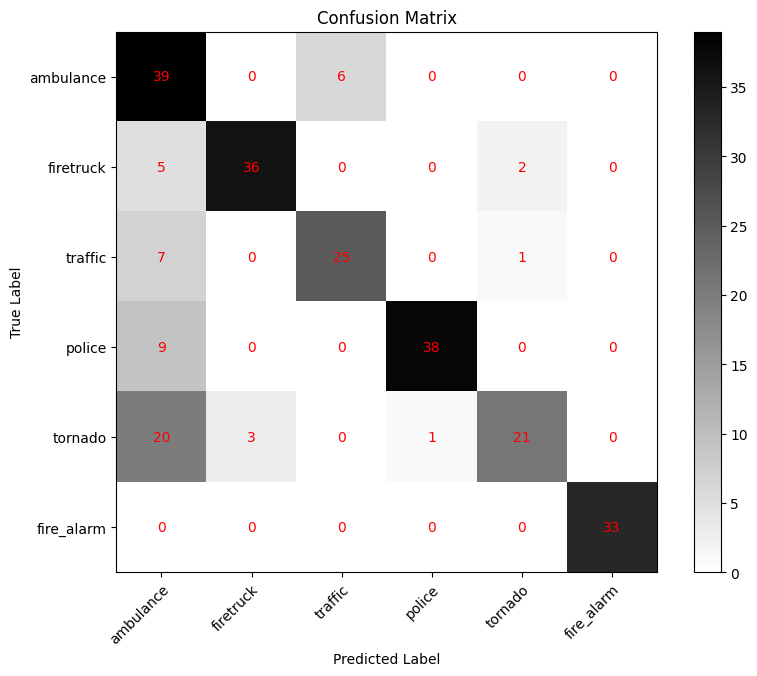

In [38]:

# Perform one-hot encoding on y_test
y_test_encoded = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])

# Convert one-hot encoded labels back to categorical labels
y_test_labels = np.argmax(y_test_encoded, axis=1)
y_pred_labels = np.argmax(rf_clf.predict(X_test), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
classes = ["ambulance", "firetruck", "traffic", "police", "tornado", "fire_alarm"]

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6))
fig.tight_layout()

im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)

cbar = ax.figure.colorbar(im, ax=ax)

tick_marks = np.arange(len(classes))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()


ADA Boost

In [39]:
from sklearn.ensemble import AdaBoostClassifier

In [40]:
ada_clf = AdaBoostClassifier(base_estimator= rf_clf, learning_rate =0.02, n_estimators =10000) # can mntion base estimator also like dec tree, random forest, etc

In [41]:
y_train1=y_train.values
y_train2 = []
for sublist in y_train1:
  if sublist[0]==1:
    y_train2.append(1)
  elif sublist[1]==1:
    y_train2.append(2)
  elif sublist[2]==1:
    y_train2.append(3)
  elif sublist[3]==1:
    y_train2.append(4)
  elif sublist[4]==1:
    y_train2.append(5)
  elif sublist[5]==1:
    y_train2.append(6)
print(y_train2)

[3, 3, 5, 5, 6, 4, 2, 5, 2, 1, 6, 5, 3, 5, 2, 6, 2, 6, 5, 6, 3, 4, 1, 4, 1, 6, 4, 4, 2, 4, 1, 2, 5, 1, 1, 3, 1, 3, 1, 3, 4, 1, 6, 2, 4, 2, 5, 4, 4, 1, 5, 5, 2, 2, 6, 3, 4, 5, 6, 1, 6, 5, 4, 4, 4, 4, 5, 6, 2, 6, 3, 6, 3, 5, 4, 4, 1, 6, 5, 1, 1, 5, 1, 6, 1, 3, 2, 1, 4, 6, 3, 4, 6, 2, 2, 1, 4, 2, 1, 2, 3, 6, 2, 5, 4, 3, 4, 5, 1, 1, 2, 3, 5, 6, 3, 1, 2, 3, 5, 6, 5, 2, 1, 2, 1, 5, 1, 3, 6, 1, 4, 1, 4, 5, 3, 3, 5, 2, 3, 2, 3, 6, 5, 6, 1, 1, 1, 4, 3, 4, 2, 4, 4, 2, 1, 3, 3, 5, 6, 2, 5, 5, 3, 5, 1, 5, 2, 6, 4, 2, 5, 2, 5, 4, 6, 4, 1, 2, 1, 4, 3, 2, 3, 4, 3, 1, 5, 4, 4, 5, 2, 3, 3, 6, 6, 6, 1, 2, 6, 1, 1, 3, 3, 3, 5, 1, 5, 2, 6, 5, 6, 6, 3, 3, 2, 3, 5, 1, 2, 1, 4, 1, 4, 3, 6, 5, 2, 3, 6, 2, 4, 4, 1, 6, 4, 1, 3, 5, 5, 2, 2, 5, 5, 3, 6, 6, 5, 6, 1, 4, 6, 5, 6, 1, 6, 1, 4, 4, 4, 1, 3, 6, 3, 2, 4, 1, 4, 4, 6, 6, 3, 6, 4, 2, 2, 4, 3, 2, 5, 3, 3, 6, 3, 6, 5, 6, 4, 6, 4, 1, 4, 6, 3, 6, 6, 4, 5, 4, 3, 6, 2, 5, 5, 4, 3, 3, 3, 3, 5, 2, 3, 6, 1, 4, 6, 1, 6, 6, 3, 3, 3, 3, 5, 1, 5, 1, 6, 3, 4, 2, 2, 4, 1, 

In [42]:
ada_clf.fit(X_train, y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=10000,
                                                         n_jobs=-1,
                                                         random_state=42),
                   learning_rate=0.02, n_estimators=10000)

In [43]:
y_test1=y_test.values
y_test2 = []
for sublist in y_test1:
  if sublist[0]==1:
    y_test2.append(1)
  elif sublist[1]==1:
    y_test2.append(2)
  elif sublist[2]==1:
    y_test2.append(3)
  elif sublist[3]==1:
    y_test2.append(4)
  elif sublist[4]==1:
    y_test2.append(5)
  elif sublist[5]==1:
    y_test2.append(6)


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test2, ada_clf.predict(X_test))

0.8617886178861789

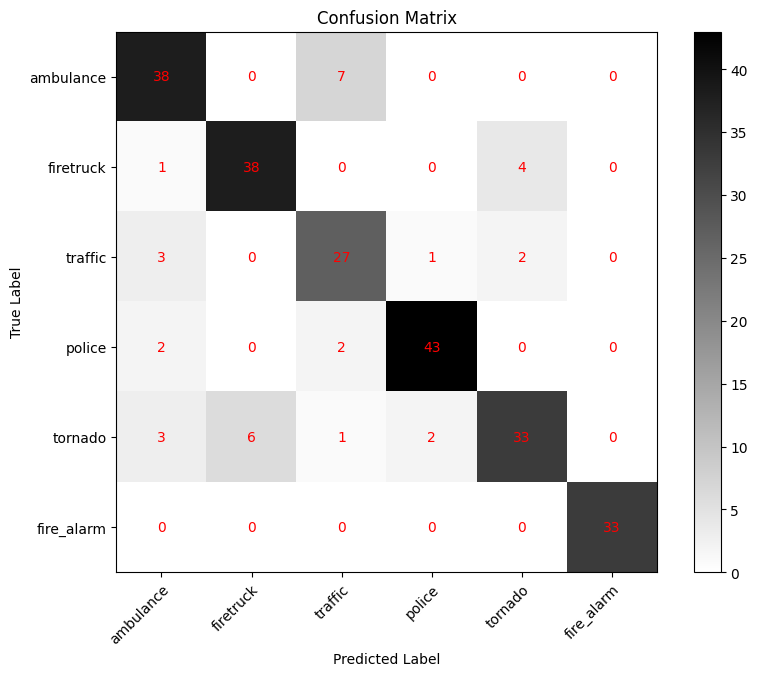

In [45]:

y_pred=ada_clf.predict(X_test)
# Compute confusion matrix
cm = confusion_matrix(y_test2, y_pred)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6))
fig.tight_layout()

im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)

cbar = ax.figure.colorbar(im, ax=ax)

tick_marks = np.arange(len(classes))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()


In [46]:
print(classification_report(y_test2, ada_clf.predict(X_test), target_names=classes))

              precision    recall  f1-score   support

   ambulance       0.81      0.84      0.83        45
   firetruck       0.86      0.88      0.87        43
     traffic       0.73      0.82      0.77        33
      police       0.93      0.91      0.92        47
     tornado       0.85      0.73      0.79        45
  fire_alarm       1.00      1.00      1.00        33

    accuracy                           0.86       246
   macro avg       0.86      0.87      0.86       246
weighted avg       0.86      0.86      0.86       246

